In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rcParams['figure.dpi'] = 150

import numpy as np

import sys
sys.path.append("..")
from encoder_learning_benchmarks import \
    optimizers, common, datasets, networks, rules, benchmark, \
    utils, animate

In [85]:
rng = np.random.RandomState(145678)
n_dim_hidden = 20

#opt = optimizers.adam.manifest.ctor()
opt = optimizers.sgd.manifest.ctor(eta=1e-1)

dset = datasets.multiplication.manifest.ctor(biased=False, skewed=True, rng=rng)
#dset = datasets.gaussian_clusters.manifest.ctor(rng=rng, biased=True)
#dset = datasets.mnist.manifest.ctor(rng=rng)

#net = networks.perceptron.manifest.ctor(dset.n_dim_in, n_dim_hidden, initialisation="normal", rng=rng)
net = networks.rbf.manifest.ctor(dset.n_dim_in, n_dim_hidden, rng=rng, learn_covariance=True)

#net_pt = networks.softmax.manifest.ctor(net.n_dim_hidden, net.n_dim_hidden, beta=20.0, rng=rng)
net_pt = None

#dec_rule = rules.pes.manifest.ctor(n_dim_hidden, dset.n_dim_out, rng=rng)
dec_rule = rules.lstsq.manifest.ctor(n_dim_hidden, dset.n_dim_out, rng=rng)

#enc_rule = rules.backprop.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng)
#enc_rule = rules.feedback_alignment.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng)
#enc_rule = rules.voja.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng, kappa=10.0)
#enc_rule = rules.neural_gas.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, lambda_=1.0, batch=True, rng=rng)
enc_rule = rules.pca.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, lambda_=10.0, rng=rng)
#enc_rule = None

In [86]:
res = benchmark.run_single_trial(
        opt, dset, net, dec_rule, enc_rule, net_pt,
        n_epochs=10, batch_size=100, n_smpls_per_epoch=10000, compute_test_error=True,
        rng=rng, sequential=True)

   10/10 (err_training=0.1381, err_validation=0.1388)


Text(0.5, 0, 'Training Epoch')

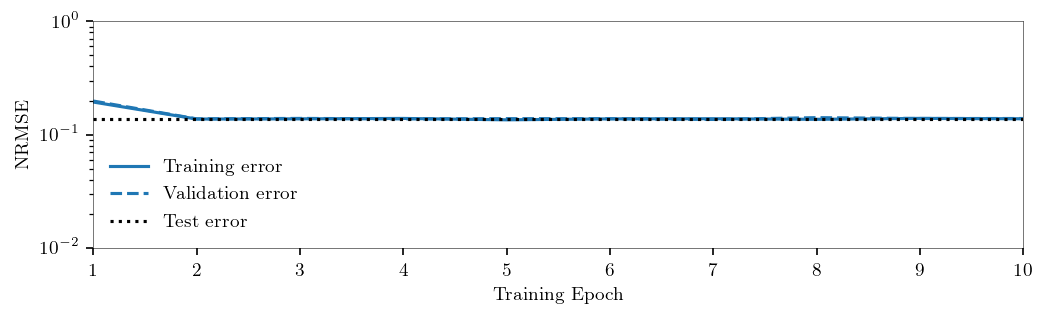

In [87]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.semilogy(res["epochs"], res["errs_training"], label="Training error")
ax.set_prop_cycle(None)
ax.semilogy(res["epochs"], res["errs_validation"], label="Validation error", linestyle='--')
if not res["err_test"] is None:
    ax.axhline(res["err_test"], label="Test error", linestyle=":", color="k")
ax.legend()
ax.set_xlim(1, res["n_epochs"])
ax.set_ylim(1e-2, 1)
ax.set_ylabel("Error rate" if dset.is_classification_dataset else "NRMSE")
ax.set_xlabel("Training Epoch")

    3/10 (err_training=0.7113, err_validation=0.7172)

KeyboardInterrupt: 

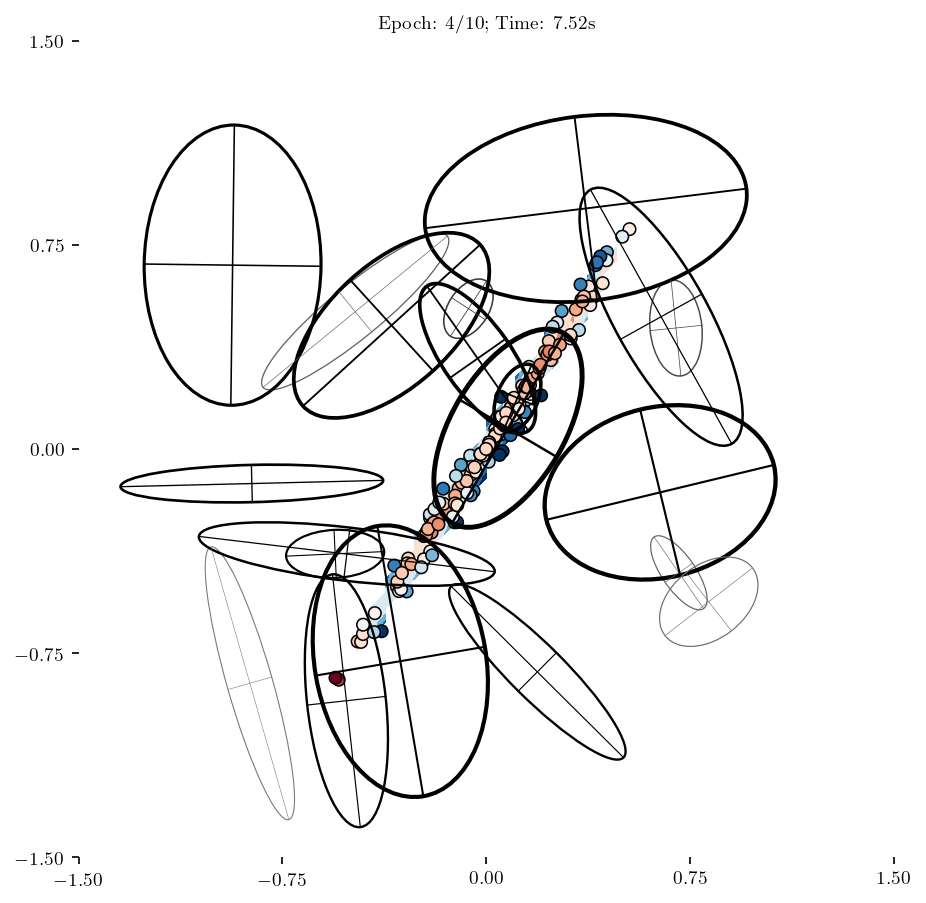

In [65]:
with animate.Animation(net.n_dim_hidden,
                       dset.n_dim_in,
                       dset.n_dim_out,
                       fps=25,
                       sec_per_smpl=0.25e-3,) as anim:
    res = benchmark.run_single_trial(
        opt, dset, net, dec_rule, enc_rule, net_pt,
        n_epochs=10, batch_size=100,
        rng=rng, sequential=True, callback=anim)

In [ ]:
fig, ax = plt.subplots()
utils.visualise_network(ax, net)
ax.set_aspect(1)

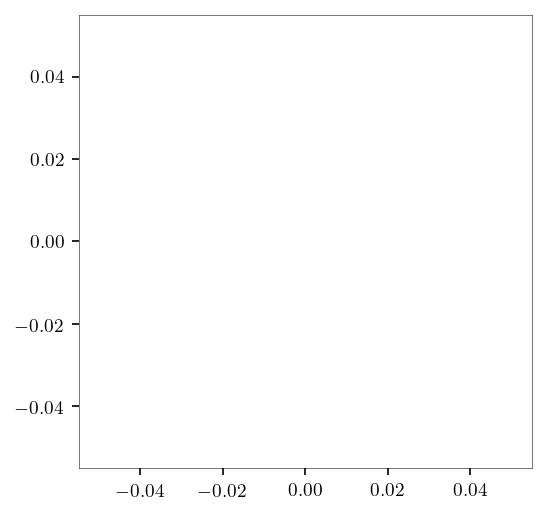

In [11]:
fig, ax = plt.subplots()
utils.plot_gaussian(ax, mu=np.zeros(2), cov=enc_rule._cov)
ax.set_aspect(1)